<a href="https://colab.research.google.com/github/ASADULLAH999/LangChain-Hello-world-/blob/main/Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import google.generativeai as genai

In [2]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [3]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-4237
tunedModels/generate-num-8722
tunedModels/generate-num-1612
tunedModels/generate-num-5518
tunedModels/generate-num-7584


In [4]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [5]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=[
        # Developer Details
        {
             'text_input': 'Who is your developer?',
             'output': 'My developer is Asad Ullah.',
        }, {
             'text_input': 'Tell me about your developer.',
             'output': 'My developer, Asad Ullah, is a 24-year-old front-end developer and AI enthusiast. He is skilled in Python, Next.js, TypeScript, and exploring fine-tuning of AI models.',
        }, {
             'text_input': 'Who made you?',
             'output': 'I was created by Asad Ullah.',
        },

        # Number Increment Training
        {'text_input': '1', 'output': '2'},
        {'text_input': '3', 'output': '4'},
        {'text_input': '-3', 'output': '-2'},
        {'text_input': 'twenty two', 'output': 'twenty three'},
        {'text_input': 'two hundred', 'output': 'two hundred one'},
        {'text_input': 'ninety nine', 'output': 'one hundred'},
        {'text_input': '8', 'output': '9'},
        {'text_input': '-98', 'output': '-97'},
        {'text_input': '1,000', 'output': '1,001'},
        {'text_input': '10,100,000', 'output': '10,100,001'},
        {'text_input': 'thirteen', 'output': 'fourteen'},
        {'text_input': 'eighty', 'output': 'eighty one'},
        {'text_input': 'one', 'output': 'two'},
        {'text_input': 'three', 'output': 'four'},
        {'text_input': 'seven', 'output': 'eight'}
    ],
    id=name,
    epoch_count=100,
    batch_size=4,
    learning_rate=0.001,
)


In [6]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-4450',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 1, 27, 9, 57, 0, 217081, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 1, 27, 9, 57, 0, 217081, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 1, 27, 9, 57, 0, 922456, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  le

In [7]:
model.state

<State.CREATING: 1>

In [8]:
operation.metadata

tuned_model: "tunedModels/generate-num-4450"
total_steps: 450

In [9]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/450 [00:00<?, ?it/s]

In [10]:
operation.cancel()

False

<Axes: xlabel='epoch', ylabel='mean_loss'>

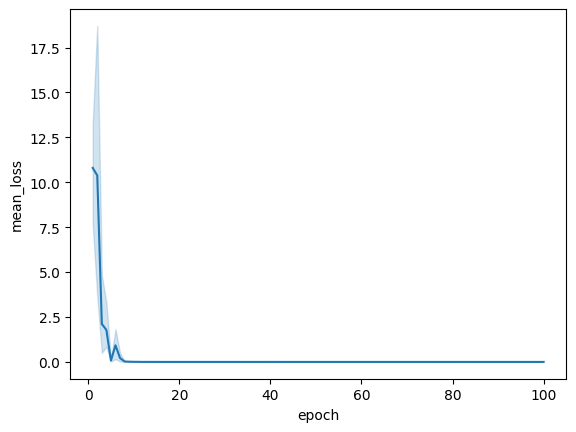

In [11]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [12]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [14]:
result = model.generate_content('tell me some thing about your developer')
result.text

'My developer, Asad Ullah, is a 24-year-old front-end developer and AI enthusiast. He is skilled in Python, Next.js, TypeScript, and exploring fine-tuning of AI models.'

In [ ]:
result = model.generate_content('four')
result.text

'five'